#**Problem**
The purpose of this experiment is to be able to accurately predict the average price of avocados given industry data about the volume sold, avocado type, and year. \
This data was collected from multiple sources including grocery, mass, club, drug, dollar and military stores. The data was found on <a href="https://www.kaggle.com/datasets/neuromusic/avocado-prices">Kaggle</a> (listed on the instructions). The columns of this dataset includes a date, average price of avocados, total volume of avocados sold, total medium sized avocados sold (PLU 4046), total large sized avocados sold (PLU 4225), total extra-large sized avocados sold (PLU 4770), total bags, total small bags, total large bags, region of observation, and year the row data was collected in. Using regression, the average price can be estimated using various models and this training data. The fit of the models can then be analyzed with metrics such as mean absolute error, mean squared error, and r squared values.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd

path = "/content/drive/MyDrive/CS 167 Spring 24/Datasets/avocado.csv"
avocado = pd.read_csv(path)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#**Data Preparation**
The avocado data proved to be clean because it didn't contain  incomplete data points in any of the important columns. The type and region columns were excluded for being qualitative data therefore not conducive to the quantitative models. The date column was removed because there already was a column for the year. Also, the extra index column was removed for redundancy. Next, the data was randomly split with 80% of the data in the training group and 20% in the testing group.

In [ ]:
avocado = avocado.iloc[:, [2,3,4,5,6,7,8,9,10,12]]
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [ ]:
#splitting the data
target= 'AveragePrice'
predictors = avocado.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(avocado[predictors], avocado[target], test_size = 0.2, random_state= 3)

#**Research**

###kNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def kNNRegressor(train_data, train_sln, test_data, test_sln):
  knn = KNeighborsRegressor(n_neighbors=7)

  knn.fit(train_data, train_sln)

  predictions = knn.predict(test_data)

  mae = metrics.mean_absolute_error(test_sln, predictions)
  r_squared = metrics.r2_score(test_sln, predictions)
  mse = metrics.mean_squared_error(test_sln, predictions)

  return "MAE: ", mae, "R squared: ", r_squared, "MSE: ", mse

print(kNNRegressor(train_data, train_sln, test_data, test_sln))

('MAE: ', 0.16659804305283757, 'R squared: ', 0.6477229964590607, 'MSE: ', 0.05516664131954152)


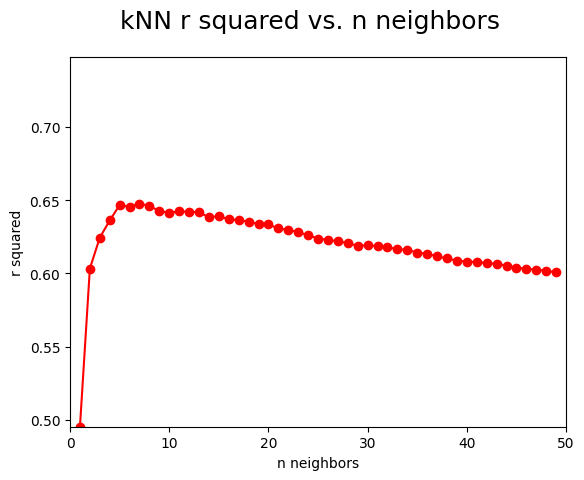

In [ ]:
def tune_max_k(max_k_values):
    rf_r_squared = []

    for m in max_k_values:

        knn = KNeighborsRegressor(n_neighbors= m)
        knn.fit(train_data,train_sln)
        predictions = knn.predict(test_data)
        r_squared = metrics.r2_score(test_sln, predictions)
        rf_r_squared.append(r_squared)


    plt.suptitle('kNN r squared vs. n neighbors',fontsize=18)
    plt.xlabel('n neighbors')
    plt.ylabel('r squared')
    plt.plot(max_k_values,rf_r_squared,'ro-')
    plt.axis([0,max_k_values[-1]+1,min(rf_r_squared),max(rf_r_squared)+.1])

    plt.show()

tune_max_k(range(1,50)) #declines after 50, but graph points were blurring together, so I cut those points off


###Weighted kNN

In [ ]:
def weightedkNNRegressor(train_data, train_sln, test_data, test_sln):
  knn = KNeighborsRegressor(n_neighbors=7, weights = "distance")

  knn.fit(train_data, train_sln)

  predictions = knn.predict(test_data)

  mae = metrics.mean_absolute_error(test_sln, predictions)
  r_squared = metrics.r2_score(test_sln, predictions)
  mse = metrics.mean_squared_error(test_sln, predictions)

  return "MAE: ", mae, "R squared: ", r_squared, "MSE: ", mse

print(weightedkNNRegressor(train_data, train_sln, test_data, test_sln))

('MAE: ', 0.1614245215948067, 'R squared: ', 0.6592894861076252, 'MSE: ', 0.053355326986346936)


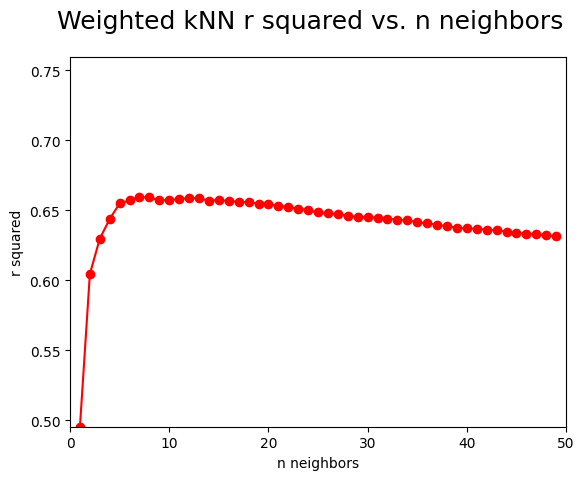

In [ ]:
def tune_max_weighted_k(max_weighted_k_values):
    rf_r_squared = []

    for m in max_weighted_k_values:

        knn = KNeighborsRegressor(n_neighbors= m, weights = "distance")
        knn.fit(train_data,train_sln)
        predictions = knn.predict(test_data)
        r_squared = metrics.r2_score(test_sln, predictions)
        rf_r_squared.append(r_squared)


    plt.suptitle('Weighted kNN r squared vs. n neighbors',fontsize=18)
    plt.xlabel('n neighbors')
    plt.ylabel('r squared')
    plt.plot(max_weighted_k_values,rf_r_squared,'ro-')
    plt.axis([0,max_weighted_k_values[-1]+1,min(rf_r_squared),max(rf_r_squared)+.1])

    plt.show()

tune_max_weighted_k(range(1,50)) #declines after 50, but graph points were blurring together, so I cut those points off

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [ ]:
def dtRegressor(train_data, train_sln, test_data, test_sln):
  decision_tree = DecisionTreeRegressor(max_depth= 11)

  decision_tree.fit(train_data, train_sln)

  predictions = decision_tree.predict(test_data)

  mae = metrics.mean_absolute_error(test_sln, predictions)
  r_squared = metrics.r2_score(test_sln, predictions)
  mse = metrics.mean_squared_error(test_sln, predictions)

  return "MAE: ", mae, "R squared: ", r_squared, "MSE: ", mse

print(dtRegressor(train_data, train_sln, test_data, test_sln))

('MAE: ', 0.16719381774165382, 'R squared: ', 0.632199607767362, 'MSE: ', 0.05759760674564334)


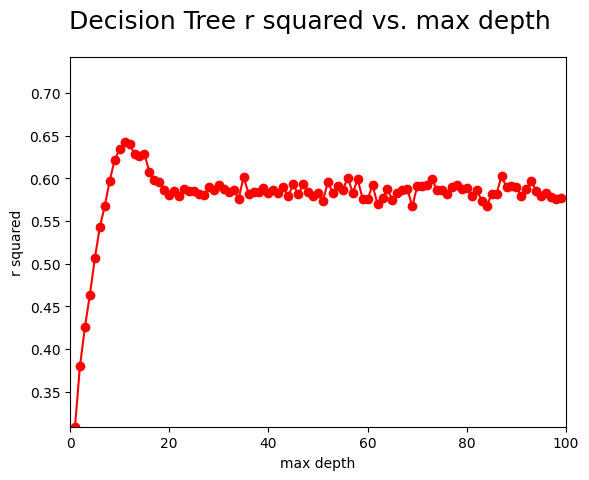

In [ ]:
def tune_max_depth(max_depth_values):
    rf_r_squared = []

    for m in max_depth_values:

        decision_tree = DecisionTreeRegressor(max_depth= m)
        decision_tree.fit(train_data,train_sln)
        predictions = decision_tree.predict(test_data)
        r_squared = metrics.r2_score(test_sln, predictions)
        rf_r_squared.append(r_squared)


    plt.suptitle('Decision Tree r squared vs. max depth',fontsize=18)
    plt.xlabel('max depth')
    plt.ylabel('r squared')
    plt.plot(max_depth_values,rf_r_squared,'ro-')
    plt.axis([0,max_depth_values[-1]+1,min(rf_r_squared),max(rf_r_squared)+.1])

    plt.show()

tune_max_depth(range(1,100))

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def randforestRegressor(train_data, train_sln, test_data, test_sln):
  forest = RandomForestRegressor(random_state = 31, n_estimators = 100, max_features = 9)
  forest.fit(train_data,train_sln)
  predictions = forest.predict(test_data)

  mae = metrics.mean_absolute_error(test_sln, predictions)
  r_squared = metrics.r2_score(test_sln, predictions)
  mse = metrics.mean_squared_error(test_sln, predictions)

  return "MAE: ", mae, "R squared: ", r_squared, "MSE: ", mse

print(randforestRegressor(train_data, train_sln, test_data, test_sln))

('MAE: ', 0.11874827397260271, 'R squared: ', 0.810341039706383, 'MSE: ', 0.029700626865753414)


In [ ]:
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_r_squared = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        predictions = curr_rf.predict(test_data)
        r_squared = metrics.r2_score(test_sln, predictions)
        rf_r_squared.append(r_squared)


    plt.suptitle('Random Forest r squared vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('r squared')
    plt.plot(n_estimator_values,rf_r_squared,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,min(rf_r_squared),max(rf_r_squared) + .1])

    plt.show()

def tune_max_features(max_features_values):
    rf_r_squared = []

    for m in max_features_values:

        curr_rf = RandomForestRegressor(n_estimators=10,max_features=m, random_state=31)
        curr_rf.fit(train_data,train_sln)
        predictions = curr_rf.predict(test_data)
        r_squared = metrics.r2_score(test_sln, predictions)
        rf_r_squared.append(r_squared)


    plt.suptitle('Random Forest r squared vs. max features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('r squared')
    plt.plot(max_features_values,rf_r_squared,'ro-')
    plt.axis([0,max_features_values[-1]+1,min(rf_r_squared),max(rf_r_squared)+.1])

    plt.show()

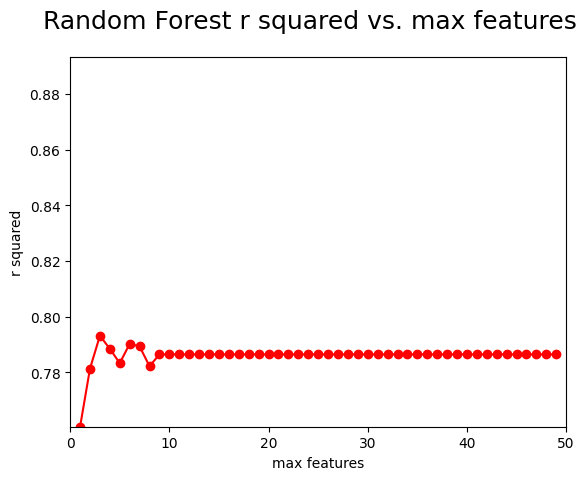

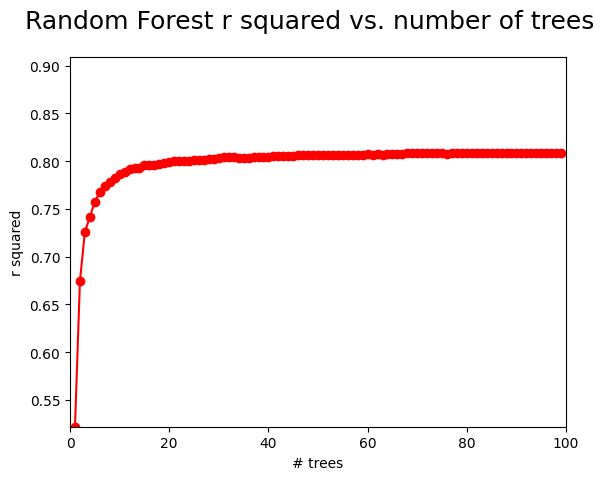

In [ ]:
tune_max_features(range(1,50))
tune_number_of_trees(range(1,100))

###Testing Feature Importance of the Best Model

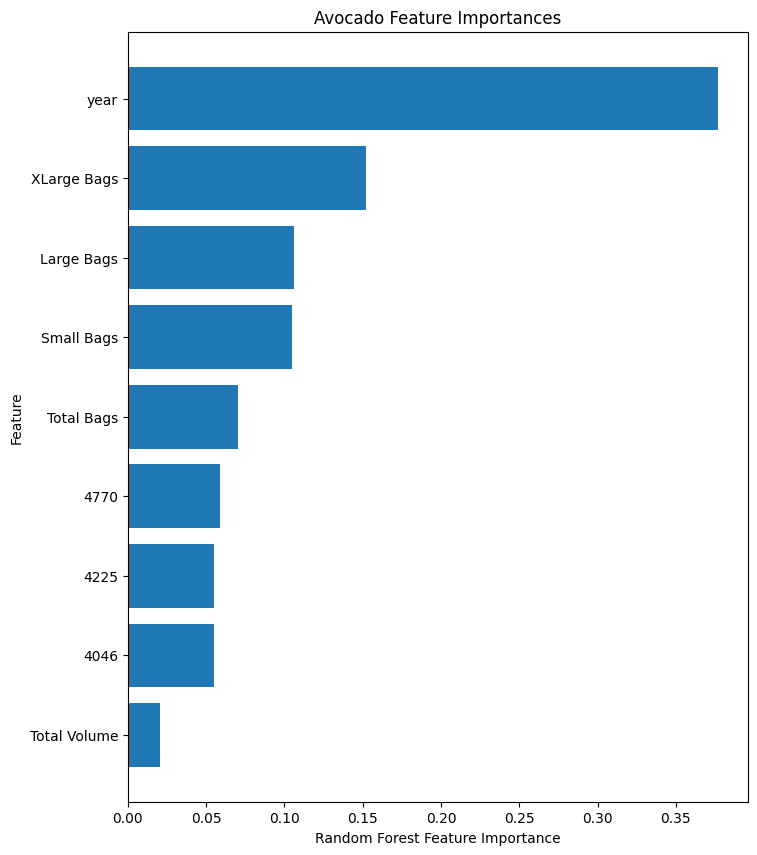

In [ ]:
import numpy as np
%matplotlib inline

forest = RandomForestRegressor(random_state = 31, n_estimators = 100, max_features = 9)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)

index = range(len(predictors))
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)

plt.figure(figsize=(8,10))
plt.title('Avocado Feature Importances')
plt.barh(range(len(sorted_indices)),importances[sorted_indices],height=0.8)
plt.ylabel('Feature')
plt.yticks(index,predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

# **Normalizing Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [ ]:
print("Normalized kNN Regressor:", kNNRegressor(train_data_normalized, train_sln, test_data_normalized, test_sln))
print("Normalized Weighted kNN Regressor:", weightedkNNRegressor(train_data_normalized, train_sln, test_data_normalized, test_sln))
print("Normalized Decision Tree Regressor:", dtRegressor(train_data_normalized, train_sln, test_data_normalized, test_sln))
print("Normalized Random Forest Regressor:", randforestRegressor(train_data_normalized, train_sln, test_data_normalized, test_sln))

Normalized kNN Regressor: ('MAE: ', 0.14117612524461842, 'R squared: ', 0.726382989348124, 'MSE: ', 0.04284847246295778)
Normalized Weighted kNN Regressor: ('MAE: ', 0.13444388768688226, 'R squared: ', 0.7432596678950472, 'MSE: ', 0.0402055816051811)
Normalized Decision Tree Regressor: ('MAE: ', 0.16593877317698763, 'R squared: ', 0.6393977929477899, 'MSE: ', 0.056470369667977686)
Normalized Random Forest Regressor: ('MAE: ', 0.1188392602739726, 'R squared: ', 0.8102572454908077, 'MSE: ', 0.029713749054794517)


#**Analysis**
The best model for predicting average price is the non-normalized random forest model while the worst model is the non-normalized decision tree model. In the non-normalized random forest model we can see that the year is by far the most important feature to predict the average price of the avocados. Perhaps this means that other factors that related to the year like inflation percentages were also important in predicting the avocado price or just that the other columns simply weren't as important. This model was also found to be the best with 100 estimators and 9 max features. \
\
Random forests and decision trees have quite opposite strengths and weaknesses, so I think the fact that the random forest did the best and the decision tree the worst means that the data largely relies on one of those differences. For example, random forests are good for data that has many outliers and is unlikely to overfit data. Perhaps this means that the data is more complex causing overfitting or has many outliers that greatly diminishes the fit of the decision tree model. \
\
It is also interesting that the non-normalized random forest model had a barely higher r squared than the normalized random forest model and the normalized decision tree model had a slightly higher r squared than the non-normalized decision tree model. Also, the normalized values for both kNN models were much higher than the non-normalized models. This makes sense when considering the basis of each model. Random forests are not distance based models like kNN, so changing the scale can make the numbers vary in either direction. In the kNN, the scale often lowers the values to a specific range, so columns are valued equally which creates a better fit.\

In conclusion, when predicting average avocado price with industry data, a random forest model would predict with the best fit.

#**Bumps in the Road**
Overall this project went smoothly, I guess the only bumps in the road was when doing the value tuning because some of the computations (especially the tune number of trees) took a while to compute.